# Clustering

En este notebook vamos a ver el método de clustering utilizando la librería de python sklearn.

## instalación de librerias
* scikit-learn
* matplotlib

## Teoría
https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

## Creación de los blobs
En esta sección crearemos los puntos con los que vamos a trabajar. Estos son los que vamos a tratar de clusterizar.

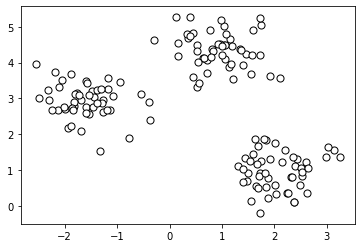

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True,
                  random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

## KMeans

In [16]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

## Visualización clusters

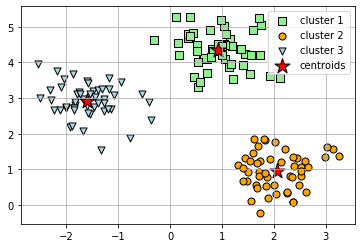

In [17]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Método del codo

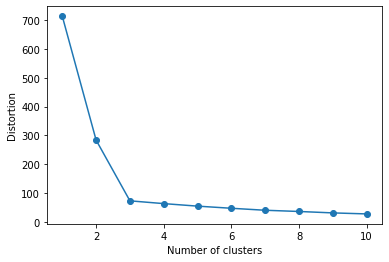

In [18]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
#     inertia: Sum of squared distances of samples to their closest cluster center. (Docs)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()